# Case Study 1: Customer Clustering

**Step 1: Importing Libraries and Dataset**

In [19]:
# Import libraries and mount
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

from scipy.cluster import hierarchy

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/2022-23/S23/CS-200/Week 11/clustering/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/2022-23/S23/CS-200/Week 11/clustering


In [2]:
# Import dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

**Step 2: Find Optimal Clusters**

In [3]:
# Determine optimal number of clusters
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

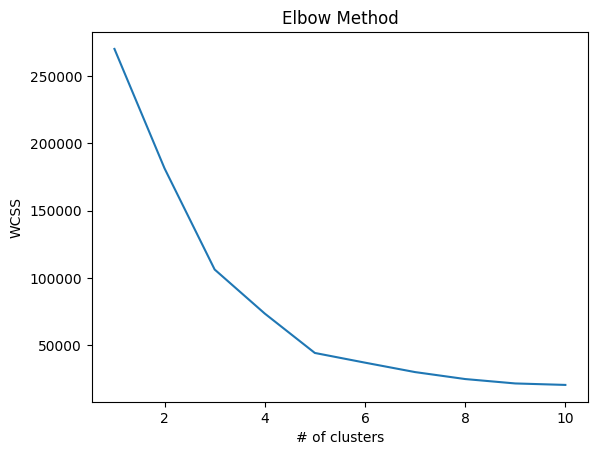

In [4]:
# Generate elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('WCSS')
plt.show()

**Step 3: Fitting K-Means**

In [5]:
# Apply K-Means to dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Step 4: Visualizing the Clusters**

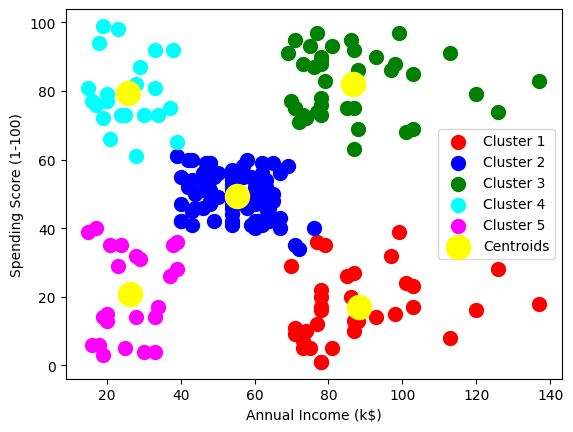

In [6]:
# Cluster Visualization
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Step 5: Find Optimal Clusters with Hierachical Model**

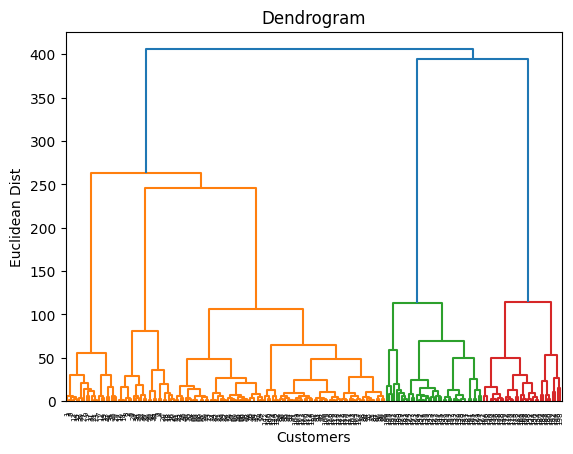

In [13]:
dendrogram_obj = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Dist')
plt.show()

**Step 6: Fitting Hierarchical Model**


In [16]:
# Training the hierarchical clustering model over the dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


**Step 7: Visualizing the Clusters**


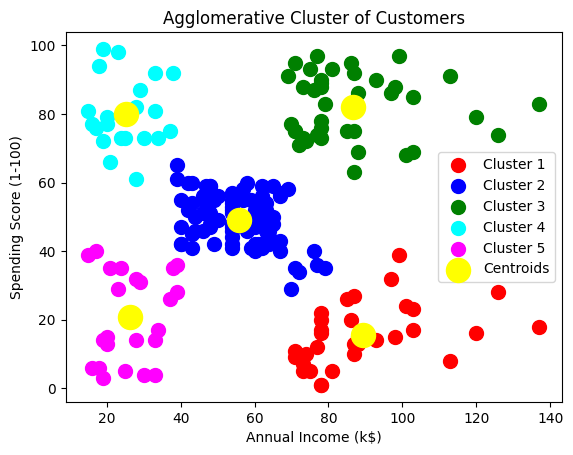

In [20]:
# Cluster Visualization
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

clf = NearestCentroid()
clf.fit(X, y_hc)
plt.scatter(clf.centroids_[:,0], clf.centroids_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Agglomerative Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Analysis**

The past two graphs represents the spending habits of our mall customers. Looking at cluster 5, this group contains people who earn high incomes but spend little money, i.e. the wealthy. This should be our target group, as we can maximize profits by marketing to this demographic.

# Case Study 2: US Arrests Database

**Step 1: Importing Libraries and Dataset**

In [ ]:
# Import libraries and mount
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

from scipy.cluster import hierarchy

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/2022-23/S23/CS-200/Week 11/clustering/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/2022-23/S23/CS-200/Week 11/clustering


In [21]:
# Import dataset
dataset = pd.read_csv('USArrests.csv')
X = dataset.iloc[:, 1:5].values

**Step 2: Find Optimal Clusters**

In [22]:
# Determine optimal number of clusters
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

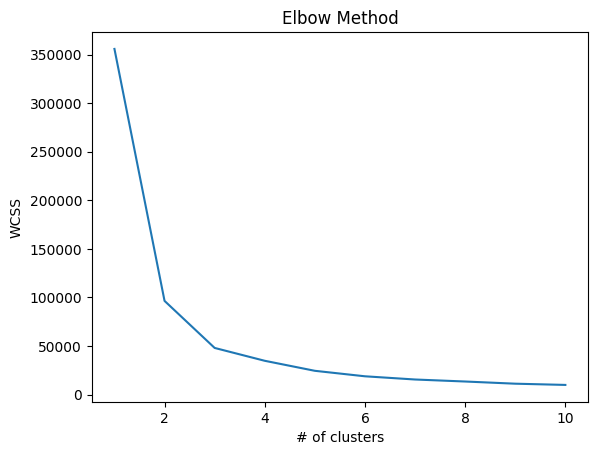

In [23]:
# Generate elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('WCSS')
plt.show()

**Step 3: Fitting K-Means**

In [24]:
# Apply K-Means to dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Step 4: Visualizing the Clusters**

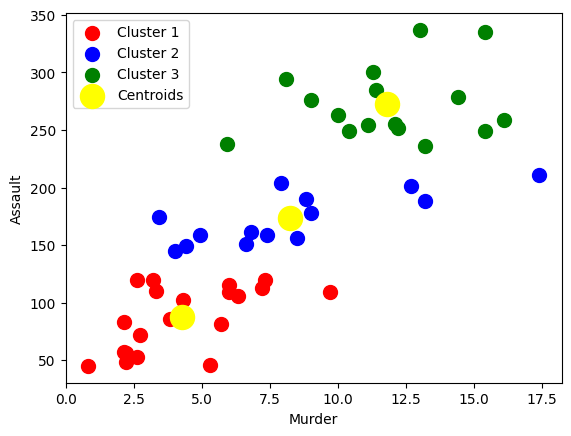

In [26]:
# Cluster Visualization
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of US States')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()

**Step 5: Find Optimal Clusters with Hierachical Model**

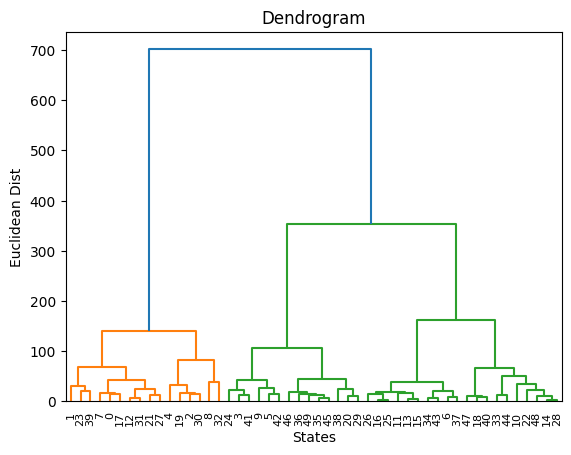

In [27]:
dendrogram_obj = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('States')
plt.ylabel('Euclidean Dist')
plt.show()

**Step 6: Fitting Hierarchical Model**


In [28]:
# Training the hierarchical clustering model over the dataset
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

print(y_hc)

[1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


**Step 7: Visualizing the Clusters**


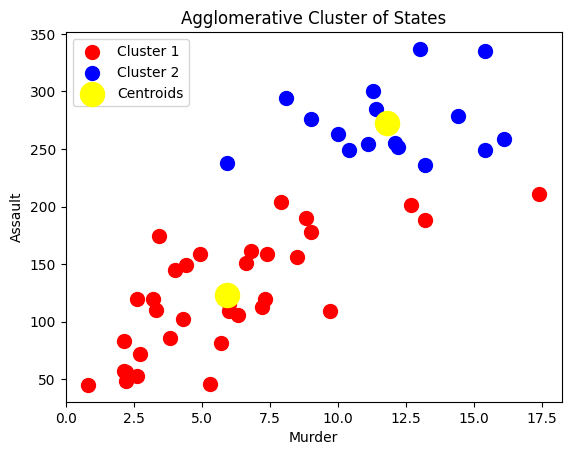

In [29]:
# Cluster Visualization
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

clf = NearestCentroid()
clf.fit(X, y_hc)
plt.scatter(clf.centroids_[:,0], clf.centroids_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Agglomerative Cluster of States')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()

**Analysis**

The past two graphs represents the crime level of all 50 U.S. States by assault and murder. In the k-Means model, the algorithm decided on 3 different clusters, while the agglomerative method chose 2. Based on the elbow method, 2 or 3 clusters appear to both be viable options, but the data spread indicates a seperation around y=225 where 2 clusters might be most appropriate. We can conclude that the states above this line then are high risk, whereas the ones below are relatively low risk. There also appears to be a positive correlation between murder and assault.

# Case Study 3: Iris Dataset

**Step 1: Importing Libraries and Dataset**

In [41]:
# Import libraries and mount
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/2022-23/S23/CS-200/Week 11/clustering/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/2022-23/S23/CS-200/Week 11/clustering


In [42]:
# Import dataset
dataset = datasets.load_iris()
X = dataset['data']

**Step 2: Find Optimal Clusters**

In [43]:
# Determine optimal number of clusters
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

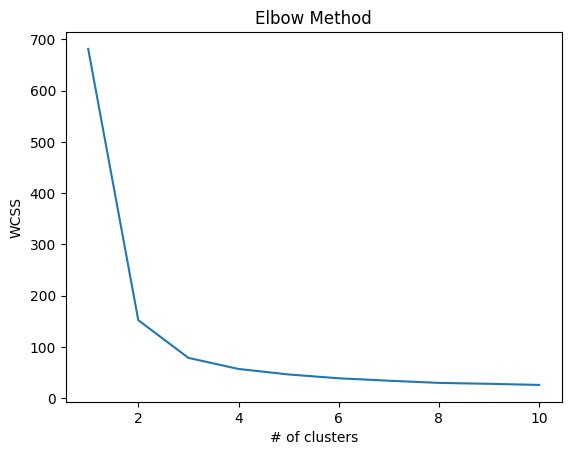

In [44]:
# Generate elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('WCSS')
plt.show()

**Step 3: Fitting K-Means**

In [45]:
# Apply K-Means to dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Step 4: Visualizing the Clusters**

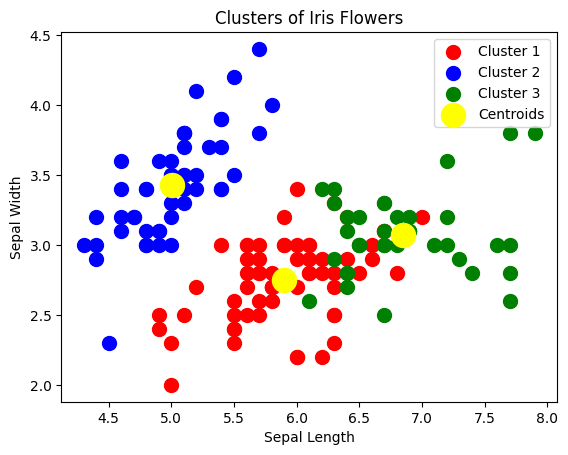

In [46]:
# Cluster Visualization
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Iris Flowers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

**Step 5: Find Optimal Clusters with Hierachical Model**

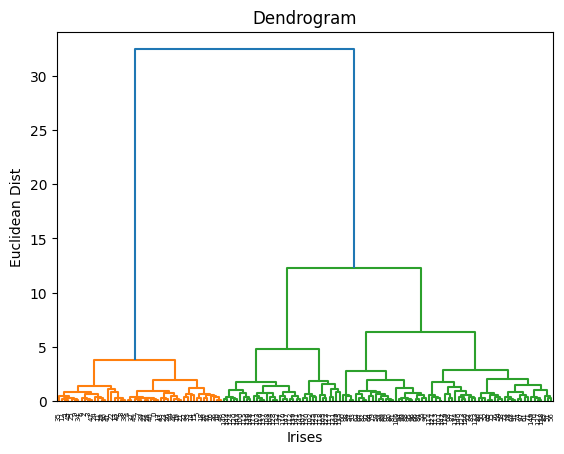

In [47]:
dendrogram_obj = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Irises')
plt.ylabel('Euclidean Dist')
plt.show()

**Step 6: Fitting Hierarchical Model**


In [49]:
# Training the hierarchical clustering model over the dataset
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

print(y_hc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


**Step 7: Visualizing the Clusters**


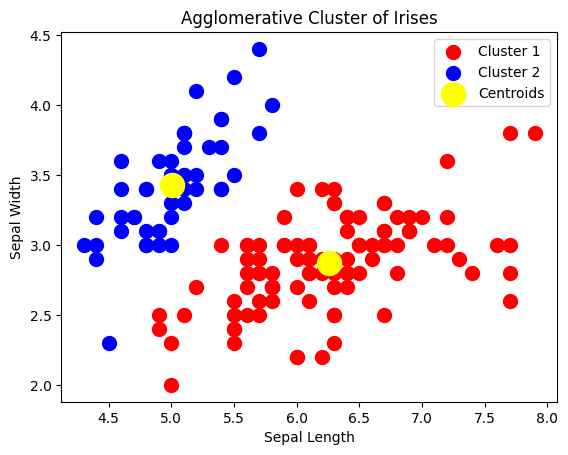

In [50]:
# Cluster Visualization
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

clf = NearestCentroid()
clf.fit(X, y_hc)
plt.scatter(clf.centroids_[:,0], clf.centroids_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Agglomerative Cluster of Irises')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

**Analysis**

The past two graphs represents the relationship between sepal length and sepal width in iris flowers. According to the past two graphs, agglomerative cluster appears to make the most sense as there is an observable inverse relationship between sepal length and sepal width, with the optimal number of clusters according to the graphs and and elbow graph being 2. 

# Case Study 4: City Dataset

**Step 1: Importing Libraries and Dataset**

In [51]:
# Import libraries and mount
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

from scipy.cluster import hierarchy

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/2022-23/S23/CS-200/Week 11/clustering/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/2022-23/S23/CS-200/Week 11/clustering


In [52]:
# Import dataset
dataset = pd.read_csv('cities.csv')
X = dataset.iloc[:, 1:4].values

**Step 2: Find Optimal Clusters**

In [53]:
# Determine optimal number of clusters
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

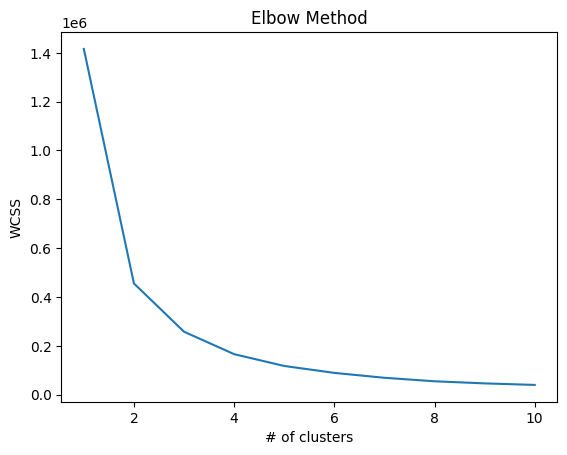

In [54]:
# Generate elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('WCSS')
plt.show()

**Step 3: Fitting K-Means**

In [56]:
# Apply K-Means to dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Step 4: Visualizing the Clusters**

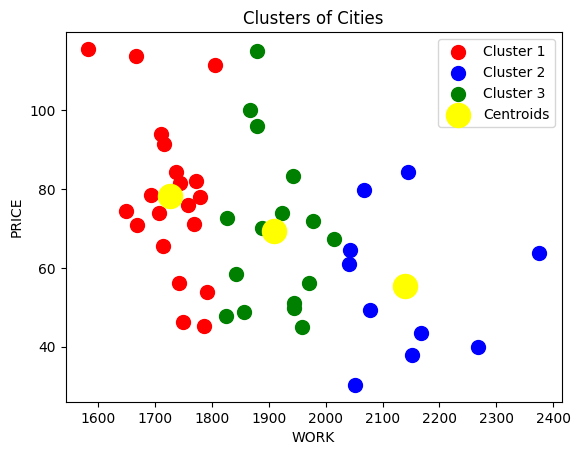

In [57]:
# Cluster Visualization
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Cities')
plt.xlabel('WORK')
plt.ylabel('PRICE')
plt.legend()
plt.show()

**Step 5: Find Optimal Clusters with Hierachical Model**

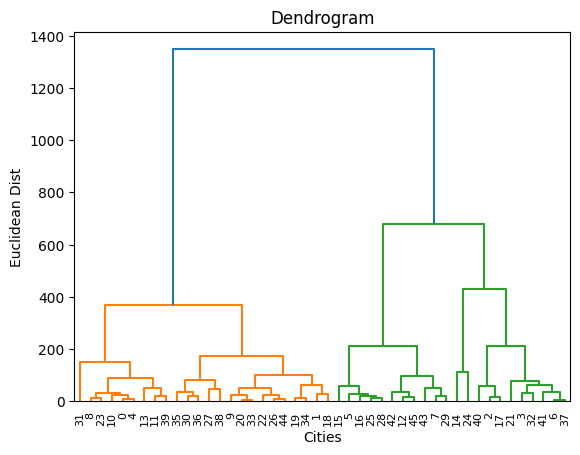

In [58]:
dendrogram_obj = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Cities')
plt.ylabel('Euclidean Dist')
plt.show()

**Step 6: Fitting Hierarchical Model**


In [59]:
# Training the hierarchical clustering model over the dataset
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

print(y_hc)

[1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1
 0 1 1 0 0 0 0 1 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


**Step 7: Visualizing the Clusters**


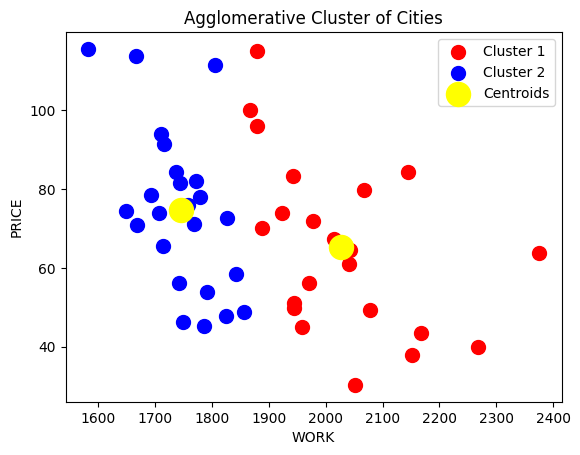

In [60]:
# Cluster Visualization
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

clf = NearestCentroid()
clf.fit(X, y_hc)
plt.scatter(clf.centroids_[:,0], clf.centroids_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Agglomerative Cluster of Cities')
plt.xlabel('WORK')
plt.ylabel('PRICE')
plt.legend()
plt.show()

**Analysis**

There is an inverse relationship between the price and work variable. The dataplot is more ambiguous than the previous case studies, but the optimal cluster number as indicated by the elbow graph and dendrogram looks to be 2, which we witness here.